## **Getting** **DataSet**



In [1]:
%%capture
!wget https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
!gdown https://drive.google.com/file/d/1VRG99lvzfhdC-YA5dfdj_a9IyMCl5WHH/view
!gdown --fuzzy https://drive.google.com/file/d/1VRG99lvzfhdC-YA5dfdj_a9IyMCl5WHH/view


In [2]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/
   creating: Dataset/Brain scans/
   creating: Dataset/Brain scans/No tumor/
   creating: Dataset/Brain scans/No tumor/Test/
  inflating: Dataset/Brain scans/No tumor/Test/no501.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no502.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no503.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no504.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no505.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no506.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no507.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no508.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no509.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no510.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no511.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no512.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no513.jpg  
  inflating: Dataset/Brain scans/No tumor/Test/no514.jp

# **Importing Libraries**

In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import csv

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from ipywidgets import widgets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras import layers ,models,optimizers
from google.colab import drive



## **Preparing the data**

In [4]:
ROOT = '/content/Dataset/Brain scans'
train_path_tumor = ROOT + '/Tumor/TRAIN'
train_path_no = ROOT + '/No tumor/TRAIN'

test_path_tumor = ROOT + '/Tumor/TEST'
test_path_no = ROOT + '/No tumor/TEST'


In [5]:
# Create an empty list to hold image details
image_list = []

# Loop through the tumor train directory and add image details to the list
for root_folder, sub_folder, filenames in os.walk(train_path_tumor):
    for filename in filenames:
        # Only consider files ending in .jpg
        if filename.endswith('.jpg'):
            # Append image details to image_list: filename, 'tumor', and 'train'
            image_list.append([filename, 'tumor', 'train'])

# Loop through the no tumor train directory and add image details to the list
for root_folder, sub_folder, filenames in os.walk(train_path_no):
    for filename in filenames:
        # Only consider files ending in .jpg
        if filename.endswith('.jpg'):
            # Append image details to image_list: filename, 'no_tumor', and 'train'
            image_list.append([filename, 'no_tumor', 'train'])

# Loop through the tumor test directory and add image details to the list
for root_folder, sub_folder, filenames in os.walk(test_path_tumor):
    for filename in filenames:
        # Only consider files ending in .jpg
        if filename.endswith('.jpg'):
            # Append image details to image_list: filename, 'tumor', and 'test'
            image_list.append([filename, 'tumor', 'test'])

# Loop through the no tumor test directory and add image details to the list
for root_folder, sub_folder, filenames in os.walk(test_path_no):
    for filename in filenames:
        # Only consider files ending in .jpg
        if filename.endswith('.jpg'):
            # Append image details to image_list: filename, 'no_tumor', and 'test'
            image_list.append([filename, 'no_tumor', 'test'])


In [6]:
image_list

[['y326.jpg', 'tumor', 'train'],
 ['y440.jpg', 'tumor', 'train'],
 ['y137.jpg', 'tumor', 'train'],
 ['y207.jpg', 'tumor', 'train'],
 ['y143.jpg', 'tumor', 'train'],
 ['y402.jpg', 'tumor', 'train'],
 ['y14.jpg', 'tumor', 'train'],
 ['y5.jpg', 'tumor', 'train'],
 ['y436.jpg', 'tumor', 'train'],
 ['y94.jpg', 'tumor', 'train'],
 ['y449.jpg', 'tumor', 'train'],
 ['y235.jpg', 'tumor', 'train'],
 ['y471.jpg', 'tumor', 'train'],
 ['y496.jpg', 'tumor', 'train'],
 ['y141.jpg', 'tumor', 'train'],
 ['y251.jpg', 'tumor', 'train'],
 ['y179.jpg', 'tumor', 'train'],
 ['y228.jpg', 'tumor', 'train'],
 ['y240.jpg', 'tumor', 'train'],
 ['y473.jpg', 'tumor', 'train'],
 ['y285.jpg', 'tumor', 'train'],
 ['y447.jpg', 'tumor', 'train'],
 ['y435.jpg', 'tumor', 'train'],
 ['y165.jpg', 'tumor', 'train'],
 ['y206.jpg', 'tumor', 'train'],
 ['y430.jpg', 'tumor', 'train'],
 ['y186.jpg', 'tumor', 'train'],
 ['y97.jpg', 'tumor', 'train'],
 ['y133.jpg', 'tumor', 'train'],
 ['y410.jpg', 'tumor', 'train'],
 ['y159.jpg', '

In [7]:
# Write the image details to a CSV file
with open('image_details.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Class', 'Type'])
    writer.writerows(image_list)

In [8]:
df = pd.read_csv('image_details.csv')
df

,Filename,Class,Type
0,y326.jpg,tumor,train
1,y440.jpg,tumor,train
2,y137.jpg,tumor,train
3,y207.jpg,tumor,train
4,y143.jpg,tumor,train
...,...,...,...
1196,no578.jpg,no_tumor,test
1197,no557.jpg,no_tumor,test
1198,no510.jpg,no_tumor,test
1199,no591.jpg,no_tumor,test


## **Data** **Visualization** 

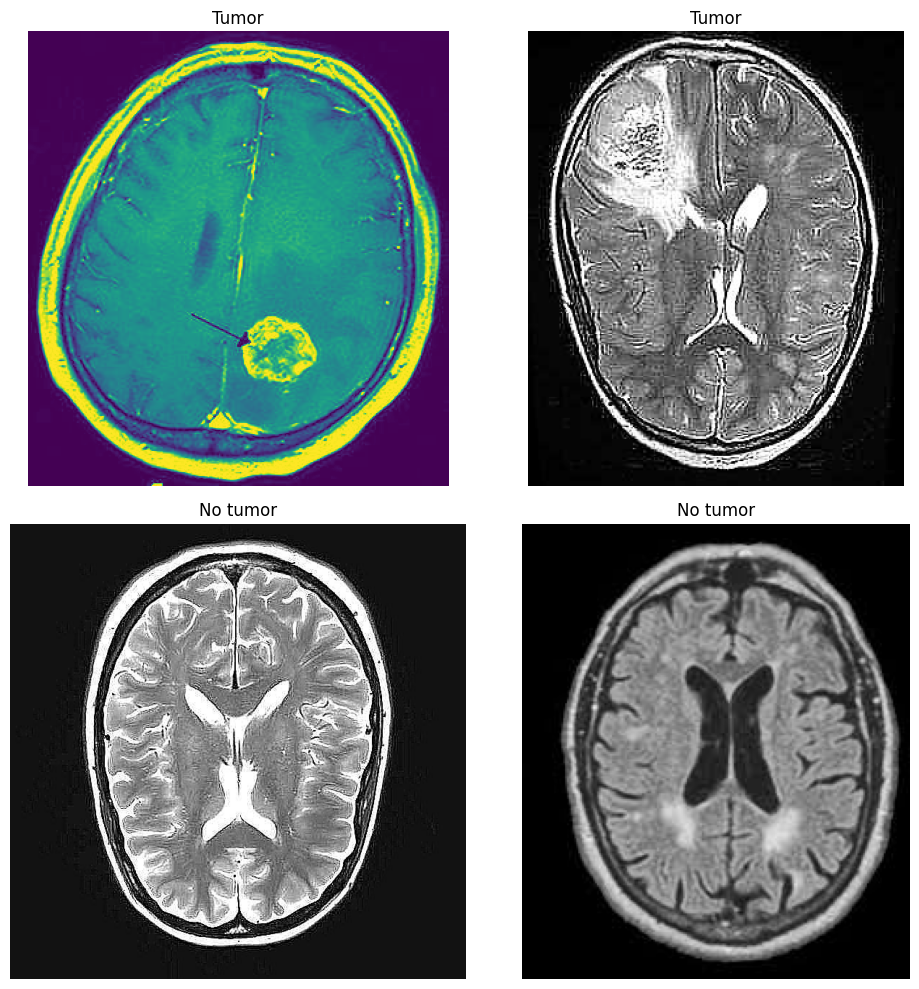

In [21]:
# Set the root directory of the image dataset
ROOT = '/content/Dataset/Brain scans'

# Define the classes and number of images to display
classes = ["Tumor", "No tumor"]
num_images = 2

# Create a figure with subplots for each class and image to display
fig, axes = plt.subplots(len(classes), num_images, figsize=(10,10))

# Loop through each class and its corresponding folder of images
for i, cls in enumerate(classes):
    cls_folder = os.path.join(ROOT, cls, "TRAIN")
    
    
    # Get a list of all image files in the folder and exclude any with "mask" in the filename
    images = os.listdir(cls_folder)
    
    # Select a random sample of images to display
    images = random.sample(images, num_images)
    
    # Loop through each selected image and display it in a subplot
    for j, image_name in enumerate(images):
        image_path = os.path.join(cls_folder, image_name)
        image = plt.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(cls)
        axes[i, j].axis('off')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()


## **Data Preprocessing**

In [10]:
class_counts = df.groupby(['Class', 'Type']).size().reset_index(name='Count')
class_counts = class_counts.sort_values(by=['Type', 'Class'], ascending=[False, True])
class_counts

,Class,Type,Count
1,no_tumor,train,501
3,tumor,train,500
0,no_tumor,test,100
2,tumor,test,100


In [23]:
# Create a list of tuples with class names and corresponding label indices
class_labels = [("No tumor", 0), ("Tumor", 1)]

# Create empty lists to store train and test data
train_data = []
test_data = []

# Loop through classes and splits to get image file paths and labels
for class_name, class_label in class_labels:
    for split in ["TRAIN", "TEST"]:
        split_folder = os.path.join(ROOT, class_name, split)
        file_names = os.listdir(split_folder)
        for file_name in file_names:
                file_path = os.path.join(split_folder, file_name)
                if split == "TRAIN":
                    train_data.append((file_path, class_label, "TRAIN"))
                else:
                    test_data.append((file_path, class_label, "TEST"))

# Create pandas DataFrames for train and test data
train_df = pd.DataFrame(train_data, columns=["file_path", "label", "split"])
train_df["label"] = train_df["label"].astype(str)
test_df = pd.DataFrame(test_data, columns=["file_path", "label", "split"])
test_df["label"] = test_df["label"].astype(str)
train_df


,file_path,label,split
0,/content/Dataset/Brain scans/No tumor/TRAIN/no...,0,TRAIN
1,/content/Dataset/Brain scans/No tumor/TRAIN/no...,0,TRAIN
2,/content/Dataset/Brain scans/No tumor/TRAIN/no...,0,TRAIN
3,/content/Dataset/Brain scans/No tumor/TRAIN/no...,0,TRAIN
4,/content/Dataset/Brain scans/No tumor/TRAIN/no...,0,TRAIN
...,...,...,...
996,/content/Dataset/Brain scans/Tumor/TRAIN/y86.jpg,1,TRAIN
997,/content/Dataset/Brain scans/Tumor/TRAIN/y495.jpg,1,TRAIN
998,/content/Dataset/Brain scans/Tumor/TRAIN/y329.jpg,1,TRAIN
999,/content/Dataset/Brain scans/Tumor/TRAIN/y314.jpg,1,TRAIN


In [ ]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)


In [ ]:
test_df

,file_path,label,split
0,/content/Dataset/Brain scans/No tumor/TEST/no5...,0,TEST
1,/content/Dataset/Brain scans/Tumor/TEST/y714.jpg,1,TEST
2,/content/Dataset/Brain scans/Tumor/TEST/y791.jpg,1,TEST
3,/content/Dataset/Brain scans/Tumor/TEST/y775.jpg,1,TEST
4,/content/Dataset/Brain scans/No tumor/TEST/no5...,0,TEST
...,...,...,...
195,/content/Dataset/Brain scans/Tumor/TEST/y744.jpg,1,TEST
196,/content/Dataset/Brain scans/Tumor/TEST/y738.jpg,1,TEST
197,/content/Dataset/Brain scans/No tumor/TEST/no5...,0,TEST
198,/content/Dataset/Brain scans/No tumor/TEST/no5...,0,TEST


## **create generators and data augmentation**

In [ ]:
# Define the list of classes
classes = ["No tumor", "Tumor"]

# Define the image size
img_size = (256, 256)

# Define the batch size
batch_size = 32

In [ ]:
# Define the data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

testgen = ImageDataGenerator(
    rescale=1./255)

# Create train and test data generators using flow_from_dataframe
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="file_path",
    y_col="label",
    subset="training",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary")



test_generator = testgen.flow_from_dataframe(
    dataframe=test_df,
    x_col="file_path",
    y_col="label",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary")


Found 1001 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


# Creating the Model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# build a classifier model to put on top of the convolutional model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_3 (Dropout)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 32769     
                                                                 
Total params: 14,747,457
Trainable params: 14,747,457
Non-trainable params: 0
_________________________________________________________________


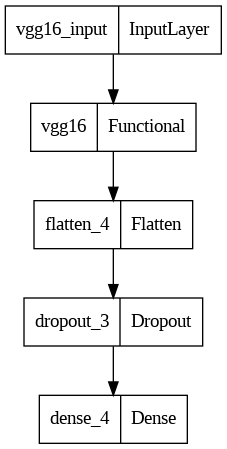

In [ ]:
plot_model(model)

# Model Training

In [ ]:
stop_criteria = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)


In [ ]:
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [ ]:
model.fit(train_generator,steps_per_epoch=1001 // batch_size,validation_steps=200 // batch_size, validation_data=test_generator, epochs=40, callbacks=[checkpoint_callback])

Epoch 1/40
31/31 [==============================] - ETA: 0s - loss: 0.5910 - accuracy: 0.6832
Epoch 1: val_loss improved from inf to 0.41299, saving model to best_model.h5
31/31 [==============================] - 29s 756ms/step - loss: 0.5910 - accuracy: 0.6832 - val_loss: 0.4130 - val_accuracy: 0.8073
Epoch 2/40
31/31 [==============================] - ETA: 0s - loss: 0.4133 - accuracy: 0.8101
Epoch 2: val_loss improved from 0.41299 to 0.33042, saving model to best_model.h5
31/31 [==============================] - 23s 728ms/step - loss: 0.4133 - accuracy: 0.8101 - val_loss: 0.3304 - val_accuracy: 0.8490
Epoch 3/40
31/31 [==============================] - ETA: 0s - loss: 0.2830 - accuracy: 0.8772
Epoch 3: val_loss improved from 0.33042 to 0.26730, saving model to best_model.h5
31/31 [==============================] - 24s 752ms/step - loss: 0.2830 - accuracy: 0.8772 - val_loss: 0.2673 - val_accuracy: 0.8802
Epoch 4/40
31/31 [==============================] - ETA: 0s - loss: 0.2201 - acc

# Plotting the accuracy and loss

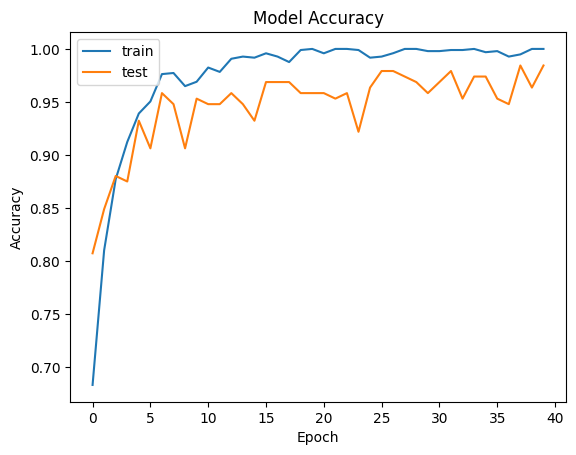

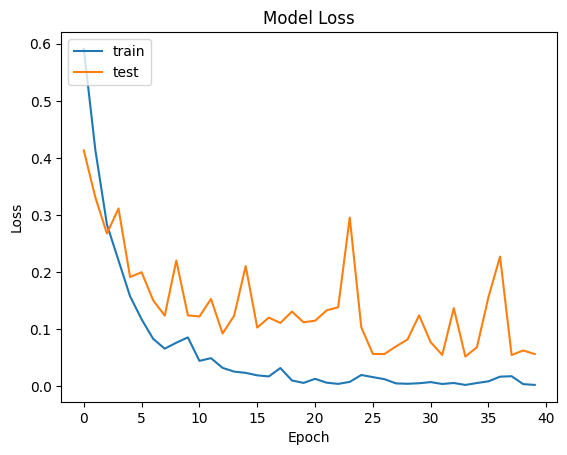

In [ ]:
# plot accuracy and loss curves
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Evaluating

In [ ]:
# evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# print the test accuracy
print('Test accuracy:', test_accuracy)

7/7 [==============================] - 1s 140ms/step - loss: 0.0538 - accuracy: 0.9850
Test accuracy: 0.9850000143051147


# Model Testing

In [ ]:
def predict_image(model, img_path):
    # Define labels
    labels= ["No Tumor", "Tumor"]
    # Load image and convert to array
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = (np.expand_dims(img_array, axis=0))/255.
    
    # Make prediction using the model
    prediction = model.predict(img_array)

    # Display image with predicted label as title
    plt.imshow(img)
    plt.axis('off')
    if prediction > 0.5:
        plt.title(labels[1])
    else:
        plt.title(labels[0])
    plt.show()


1/1 [==============================] - 8s 8s/step


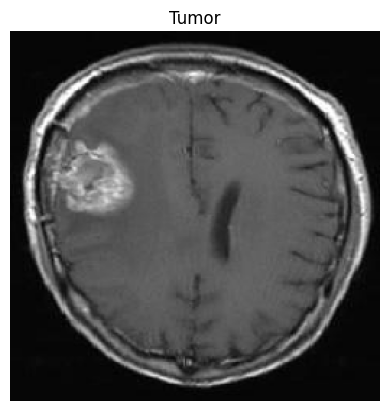

In [ ]:
predict_image(model, "/content/Dataset/Brain scans/Tumor/TEST/y701.jpg")

1/1 [==============================] - 0s 21ms/step


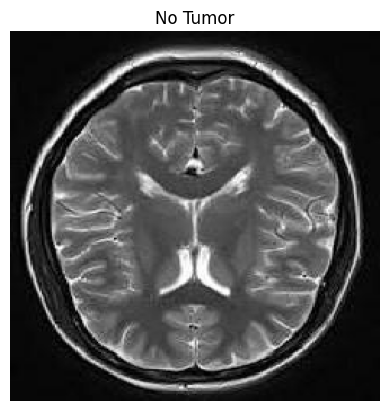

In [ ]:
predict_image(model, "/content/Dataset/Brain scans/No tumor/TRAIN/no11.jpg")

# Model Saving

In [ ]:
model.save('Brain Scan_model3.h5')

## Model loading

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Brain Scan_model.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model from file
model = load_model('/content/Brain Scan_model3.h5')